In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data (2).csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'])


Сгруппируйте данные по дате, посчитайте количество продаж

In [9]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()
grouped_df.rename(columns={'Количество': 'Количество продаж'}, inplace=True)

Вывести несколько первых строк сгруппированных данных

In [10]:
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

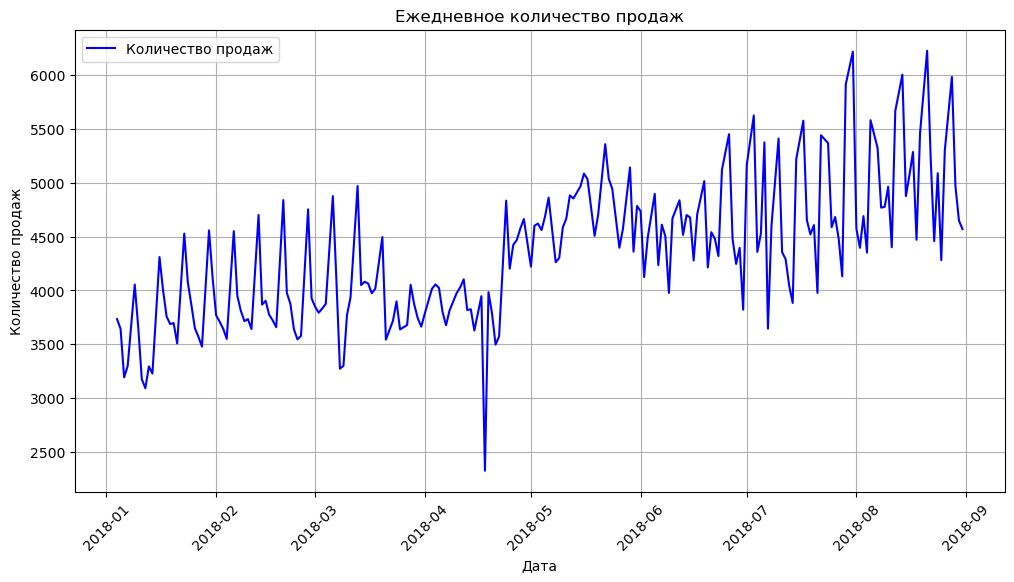

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], label='Количество продаж', color='b')
plt.title('Ежедневное количество продаж')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [12]:
max_sales_row = df[df['Количество'] == df['Количество'].max()]
print(max_sales_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [15]:
df['Месяц'] = df['Дата'].dt.month
df['День недели'] = df['Дата'].dt.day_name()

summer_wednesdays = df[(df['Склад'] == 3) &
                       (df['Месяц'].isin([6, 7, 8])) &
                       (df['День недели'] == 'Wednesday')]

top_product = summer_wednesdays.groupby('Номенклатура').agg({'Количество': 'sum'}).sort_values(by='Количество', ascending=False).head(1)
print(top_product)

              Количество
Номенклатура            
product_1           2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных о погоде
weather_data = pd.read_csv('weather_data.csv')  # Замените на путь к файлу с данными погоды

# 2. Преобразование данных о погоде
weather_data['Дата'] = pd.to_datetime(weather_data['Дата'])  # Приведение формата даты
weather_data = weather_data[['Дата', 'Средняя температура']]  # Выбор нужных столбцов
weather_data.rename(columns={'Средняя температура': 'T'}, inplace=True)

# 3. Объединение с данными продаж
merged_df = pd.merge(grouped_df, weather_data, on='Дата', how='left')

# 4. Построение графика y=['Количество продаж', 'T']
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', color='b')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r')
plt.title('График продаж и температуры')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Отдельный график температуры
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='orange')
plt.title('График температуры')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 0: invalid continuation byte

In [5]:
import chardet

# Определите кодировку файла
with open('weather_data.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result['encoding'])


windows-1251


In [6]:
# Укажите правильную кодировку
weather_data = pd.read_csv('weather_data.csv', encoding='cp1251')


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных о погоде
weather_data = pd.read_csv('weather_data.csv', encoding='cp1251')

# Преобразование формата даты с указанием точного формата
weather_data['Дата'] = pd.to_datetime(weather_data['Дата'], format='%Y-%m-%d')

# Оставляем нужные столбцы
weather_data = weather_data[['Дата', 'Средняя температура']].rename(columns={'Средняя температура': 'T'})

# Подготовка данных о продажах (убедитесь, что этот код выполнен ранее)
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()
grouped_df.rename(columns={'Количество': 'Количество продаж'}, inplace=True)

# Объединение данных о продажах с погодой
merged_df = pd.merge(grouped_df, weather_data, on='Дата', how='left')

# Построение графика y=['Количество продаж', 'T']
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', color='b')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r')
plt.title('График продаж и температуры')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Отдельный график для температуры
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='orange')
plt.title('График температуры')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [18]:
# Преобразуем столбец "Дата" в формате datetime в обоих DataFrame
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], format='%d/%m/%Y', errors='coerce')
weather_data['Дата'] = pd.to_datetime(weather_data['Дата'], format='%d/%m/%Y', errors='coerce')

# Убедитесь, что преобразование прошло успешно
print(grouped_df.dtypes)
print(weather_data.dtypes)

# Теперь объединение должно работать без ошибок
merged_df = pd.merge(grouped_df, weather_data, on='Дата', how='left')


Дата                 datetime64[ns]
Количество продаж             int64
dtype: object
Дата    datetime64[ns]
T              float64
dtype: object


Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object
        Дата  Количество продаж   T
0 2018-01-04               3734 NaN
1 2018-01-05               3643 NaN
2 2018-01-06               3193 NaN
3 2018-01-07               3298 NaN
4 2018-01-09               4055 NaN


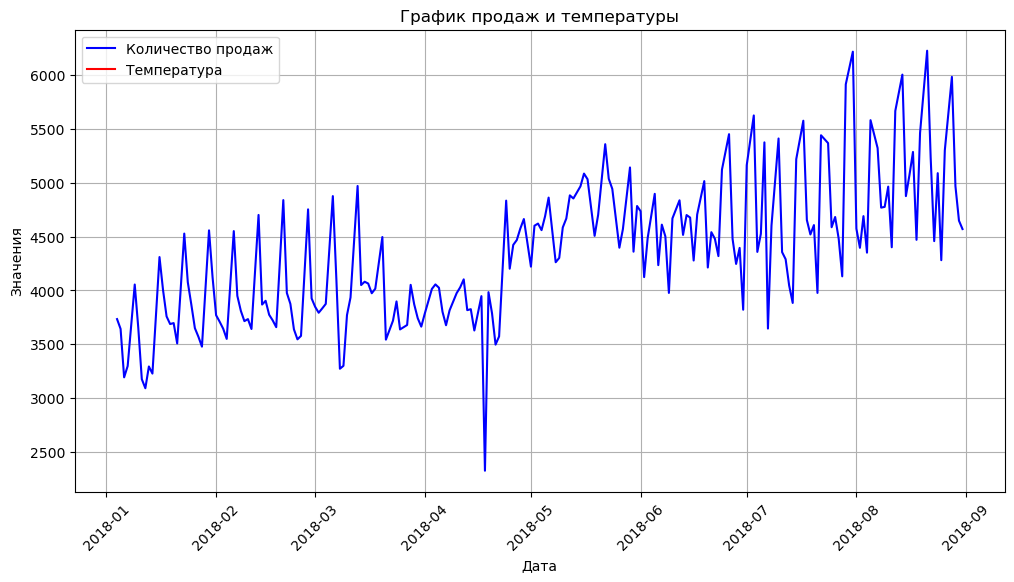

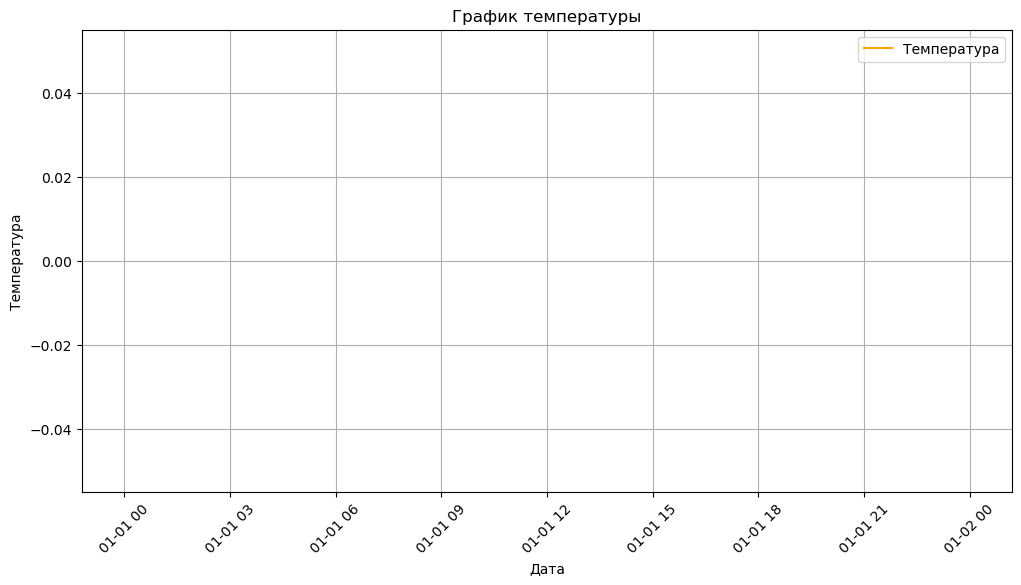

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load sales data
# Replace 'data (1).csv' with the correct path to your sales data file
sales_data_file = 'data (2).csv'
df = pd.read_csv(sales_data_file, encoding='utf-8')  # Adjust encoding if necessary

# Ensure the 'Дата' column is in datetime format
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d', errors='coerce')

# Check data types to confirm
print(df.dtypes)

# Step 2: Prepare sales data (group by date and sum sales)
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()
grouped_df.rename(columns={'Количество': 'Количество продаж'}, inplace=True)

# Step 3: Load weather data
# Replace 'weather_data.csv' with the correct path to your weather data file
weather_data_file = 'weather_data.csv'
weather_data = pd.read_csv(weather_data_file, encoding='cp1251')  # Adjust encoding if necessary

# Convert the 'Дата' column in weather data to datetime
weather_data['Дата'] = pd.to_datetime(weather_data['Дата'], format='%Y-%m-%d', errors='coerce')

# Keep only the relevant columns and rename for clarity
weather_data = weather_data[['Дата', 'Средняя температура']].rename(columns={'Средняя температура': 'T'})

# Step 4: Merge sales data with weather data on the 'Дата' column
merged_df = pd.merge(grouped_df, weather_data, on='Дата', how='left')

# Check the merged dataframe
print(merged_df.head())

# Step 5: Plot sales and temperature data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', color='b')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r')
plt.title('График продаж и температуры')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 6: Plot temperature data separately
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='orange')
plt.title('График температуры')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
